In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


In [2]:
raw_df = pd.read_csv('../data/weatherAUS.csv')
raw_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
raw_df.dropna(subset=['RainTomorrow'], inplace=True)

In [5]:
year = pd.to_datetime(raw_df['Date']).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

print(train_df.shape, val_df.shape, test_df.shape)

(98988, 23) (17231, 23) (25974, 23)


In [6]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [7]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [8]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


## Imputing missing numeric values

In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean').fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])
test_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(raw_df[numeric_cols])


train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])


val_inputs.describe().loc[['min', 'max']]


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


## Encoding Categorical Data


In [11]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(raw_df[categorical_cols])

encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

train_inputs


C:\Users\DILSHOD\AppData\Local\Temp\ipykernel_25680\1035626691.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\DILSHOD\AppData\Local\Temp\ipykernel_25680\1035626691.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\DILSHOD\AppData\Local\Temp\ipykernel_25680\1035626691.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resu

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
0,Albury,0.516509,0.523629,0.001617,0.037723,0.525852,W,0.294574,W,WNW,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,Albury,0.375000,0.565217,0.000000,0.037723,0.525852,WNW,0.294574,NNW,WSW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,Albury,0.504717,0.576560,0.000000,0.037723,0.525852,WSW,0.310078,W,WSW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Albury,0.417453,0.620038,0.000000,0.037723,0.525852,NE,0.139535,SE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Albury,0.613208,0.701323,0.002695,0.037723,0.525852,W,0.271318,ENE,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,0.599057,0.718336,0.000000,0.037723,0.525852,SSE,0.286822,ESE,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144549,Uluru,0.556604,0.786389,0.000000,0.037723,0.525852,NE,0.193798,ENE,SW,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144550,Uluru,0.608491,0.805293,0.000000,0.037723,0.525852,ESE,0.255814,ESE,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144551,Uluru,0.674528,0.818526,0.000000,0.037723,0.525852,ESE,0.286822,ESE,SSW,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Filter Out Numeric Columns only

In [12]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_vals = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

X_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2498,0.681604,0.801512,0.000000,0.037723,0.525852,0.372093,0.000000,0.080460,0.46,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,0.693396,0.725898,0.001078,0.037723,0.525852,0.341085,0.069231,0.195402,0.54,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,0.634434,0.527410,0.005930,0.037723,0.525852,0.325581,0.084615,0.448276,0.62,0.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,0.608491,0.538752,0.042049,0.037723,0.525852,0.255814,0.069231,0.195402,0.74,0.65,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2502,0.566038,0.523629,0.018329,0.037723,0.525852,0.193798,0.046154,0.103448,0.92,0.63,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0.283019,0.502836,0.000000,0.037723,0.525852,0.193798,0.115385,0.149425,0.59,0.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145455,0.266509,0.533081,0.000000,0.037723,0.525852,0.193798,0.100000,0.126437,0.51,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145456,0.285377,0.568998,0.000000,0.037723,0.525852,0.124031,0.100000,0.103448,0.56,0.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145457,0.327830,0.599244,0.000000,0.037723,0.525852,0.240310,0.069231,0.103448,0.53,0.24,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, train_targets)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Evaluation of Values(Predictions)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

train_preds = model.predict(X_train)

print(pd.value_counts(train_preds))

print(accuracy_score(train_preds, train_targets))

train_probs = model.predict_proba(X_train)
print(train_probs)

No     76707
Yes    22281
Name: count, dtype: int64
0.9999797955307714
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


C:\Users\DILSHOD\AppData\Local\Temp\ipykernel_25680\429420007.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(train_preds))


## Result of OverFitting

The Decision tree model remembered all the values without generalizing and learning patterns. Hence when it tested with new data, it gives very low accuracy

In [15]:
model.score(X_vals, val_targets)

0.7921188555510418

[Text(0.5, 0.9, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.7, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]'),
 Text(0.0625, 0.3, 'Pressure3pm <= 0.583\ngini = 0.363\nsamples = 12620\nvalue = [9618, 3002]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Humidity3pm <= 0.512\ngini = 0.153\nsamples = 56632\nvalue = [51920, 4712]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.3, 'WindGustSpeed <= 0.318\ngini = 0.293\nsamples = 4299\nvalue = [3531, 768]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'WindGustSpeed <= 0.333\ngini = 0.478\nsampl

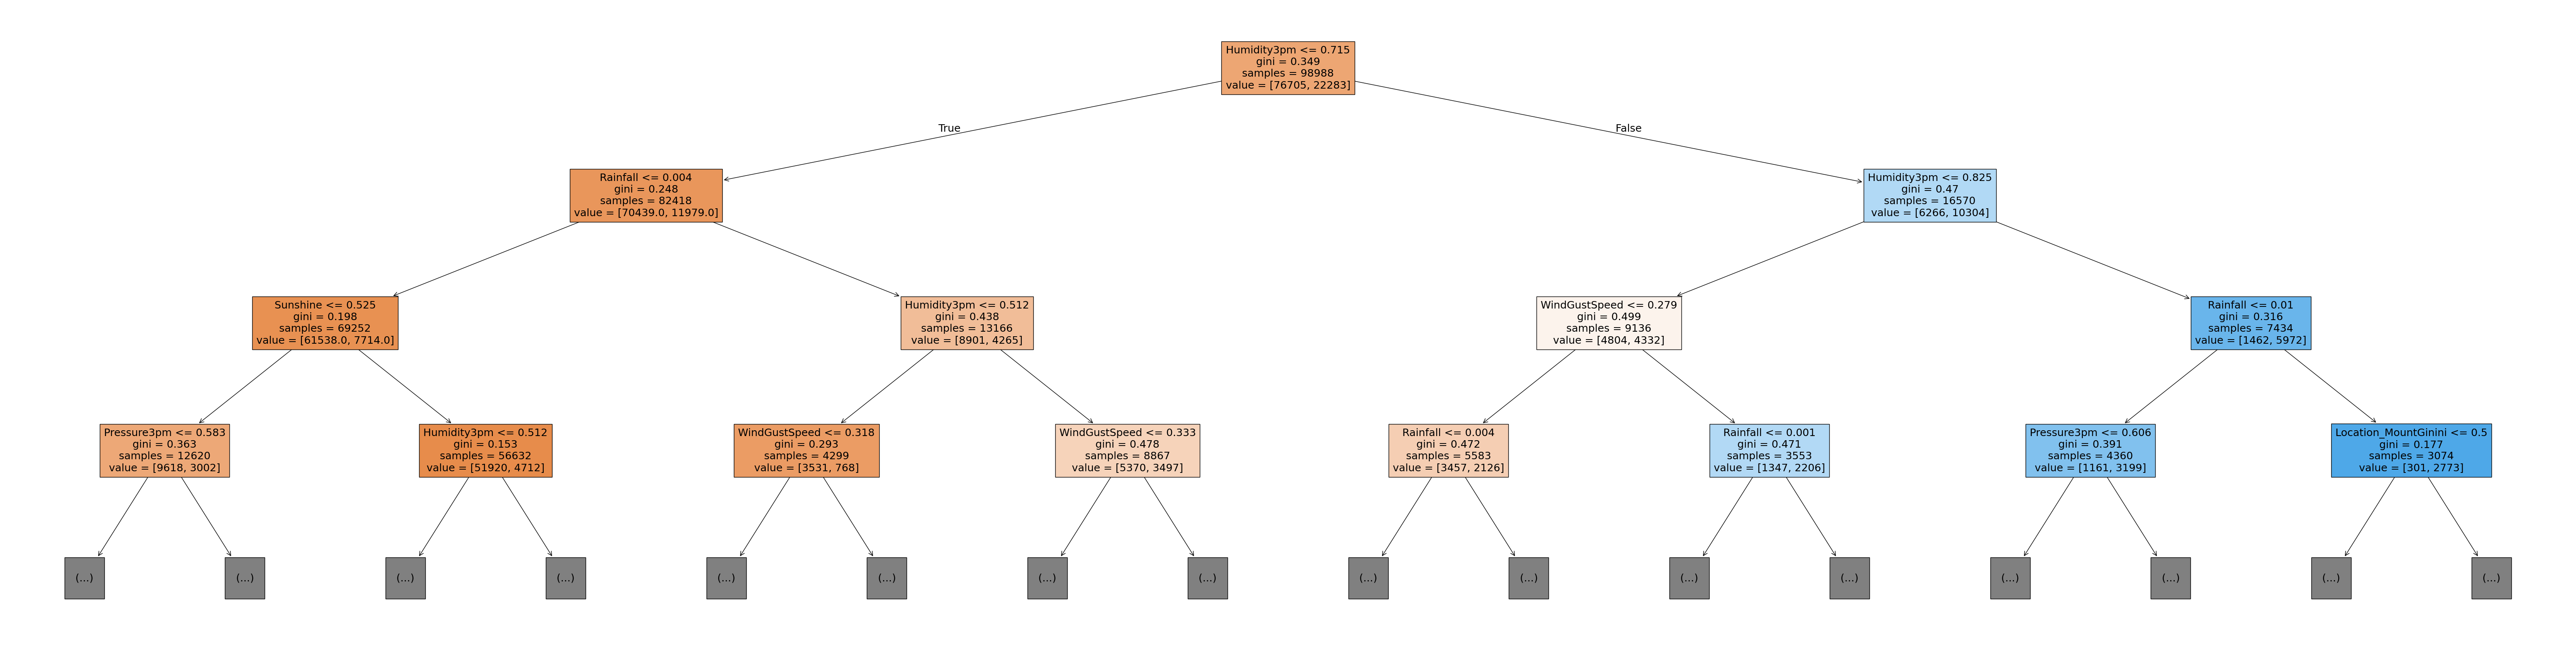

In [16]:
from sklearn.tree import plot_tree, export_text

plt.figure(figsize=(80, 20))
plot_tree(model, feature_names=X_train.columns, max_depth=3, filled=True)

In [17]:
model.tree_.max_depth

48

In [18]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

In [19]:
model.feature_importances_

array([3.48942086e-02, 3.23605486e-02, 5.91385668e-02, 2.49619907e-02,
       4.94652143e-02, 5.63334673e-02, 2.80205998e-02, 2.98128801e-02,
       4.02182908e-02, 2.61441297e-01, 3.44145027e-02, 6.20573699e-02,
       1.36406176e-02, 1.69229866e-02, 3.50001550e-02, 3.04064076e-02,
       2.24086587e-03, 2.08018104e-03, 1.27475954e-03, 7.26936324e-04,
       1.39779517e-03, 1.15264873e-03, 6.92808159e-04, 1.80675598e-03,
       1.08370901e-03, 1.19773895e-03, 8.87119103e-04, 2.15764220e-03,
       1.67094731e-03, 7.98919493e-05, 1.10558668e-03, 1.42008656e-03,
       4.10087635e-04, 1.09028115e-03, 1.44164766e-03, 9.08284767e-04,
       1.05770304e-03, 6.18133455e-04, 1.80387272e-03, 2.10403527e-03,
       2.74413333e-04, 7.31599405e-04, 1.35408990e-03, 1.54759332e-03,
       1.30917564e-03, 1.07134670e-03, 8.36408023e-04, 1.62662229e-03,
       1.00326116e-03, 2.16053455e-03, 8.46802258e-04, 1.88919081e-03,
       9.29325203e-04, 1.29545157e-03, 1.27604831e-03, 5.12736888e-04,
      

In [20]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)


,feature,importance
9,Humidity3pm,0.261441
11,Pressure3pm,0.062057
2,Rainfall,0.059139
5,WindGustSpeed,0.056333
4,Sunshine,0.049465
8,Humidity9am,0.040218
14,Temp9am,0.035000
0,MinTemp,0.034894
10,Pressure9am,0.034415
1,MaxTemp,0.032361


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

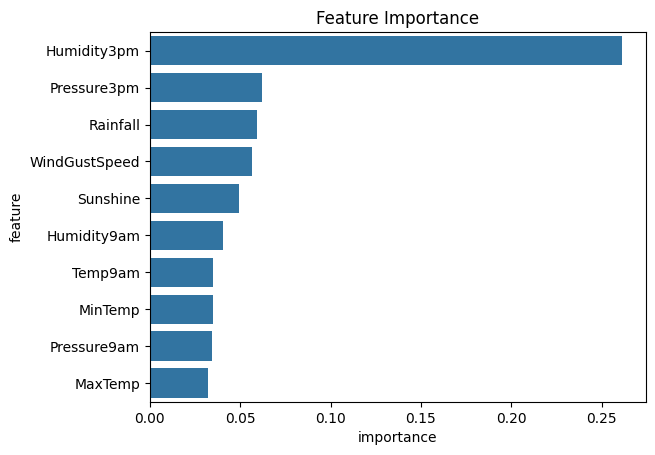

In [21]:
plt.title("Feature Importance")
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

In [22]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

model.fit(X_train, train_targets)

model.score(X_train, train_targets)

0.8291308037337859

In [23]:
model.score(X_vals, val_targets)

0.8334397307178921

In [24]:
model.classes_

array(['No', 'Yes'], dtype=object)

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]\nclass = No'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]\nclass = No'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.363\nsamples = 12620\nvalue = [9618, 3002]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.153\nsamples = 56632\nvalue = [51920, 4712]\nclass = No'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.293\nsamples = 4299\nvalue = [3531, 768]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.478\nsamples = 8867\nvalue = [5370, 3497]\nclass = No'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]\nclass = Yes'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'WindGustSp

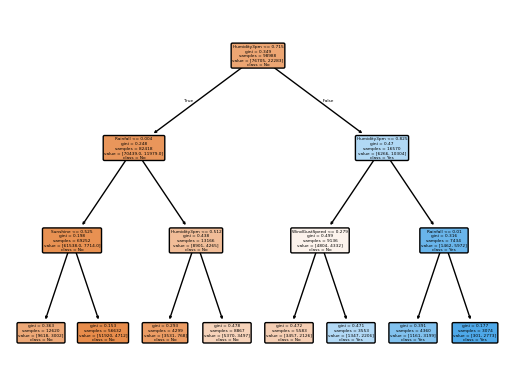

In [ ]:
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_) # type: ignore

## Finding the best max_depth to work with validation data

In [26]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_vals, val_targets)

    return {"Max Depth": md, "Training error": train_acc, "Validation Error": val_acc}

error_df = pd.DataFrame(max_depth_error(md) for md in range(1, 21))

In [27]:
error_df

,Max Depth,Training error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153312,0.154605
7,8,0.147806,0.158029
8,9,0.140906,0.156578
9,10,0.132945,0.157333


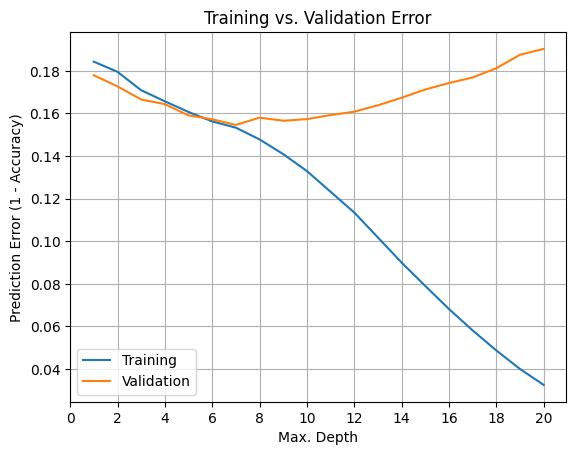

In [32]:
plt.figure()
plt.plot(error_df['Max Depth'], error_df['Training error'])
plt.plot(error_df['Max Depth'], error_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.grid()
plt.legend(['Training', 'Validation'])

In [34]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train, train_targets)
model.score(X_vals, val_targets)

0.8453949277465034

## HyperParameter called max_leaf_nodes

In [36]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

model.fit(X_train, train_targets)
model.score(X_train, train_targets)
model.score(X_vals, val_targets)

0.8442342290058615

In [ ]:
model.tree_.max_depth # type: ignore

12

[Text(0.5883838383838383, 0.9615384615384616, 'x[9] <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]\nclass = No'),
 Text(0.32702020202020204, 0.8846153846153846, 'x[2] <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]\nclass = No'),
 Text(0.4577020202020202, 0.9230769230769231, 'True  '),
 Text(0.16982323232323232, 0.8076923076923077, 'x[4] <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]\nclass = No'),
 Text(0.08417508417508418, 0.7307692307692307, 'x[11] <= 0.583\ngini = 0.363\nsamples = 12620\nvalue = [9618, 3002]\nclass = No'),
 Text(0.037037037037037035, 0.6538461538461539, 'x[5] <= 0.364\ngini = 0.469\nsamples = 4691\nvalue = [2932, 1759]\nclass = No'),
 Text(0.013468013468013467, 0.5769230769230769, 'x[9] <= 0.275\ngini = 0.435\nsamples = 3251\nvalue = [2210, 1041]\nclass = No'),
 Text(0.006734006734006734, 0.5, 'gini = 0.161\nsamples = 272\nvalue = [248, 24]\nclass = No'),
 Text(0.020202020202020204, 0.5, 'x[4] <= 0.052\ngini 

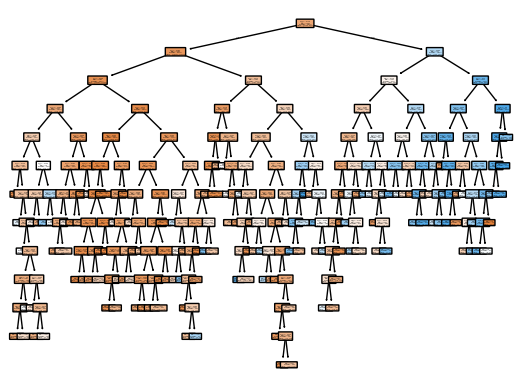

In [43]:
plot_tree(model, filled=True, rounded=True, class_names=model.classes_)

In [ ]:
def max_leaf_node_error(ln):
    model = DecisionTreeClassifier(max_leaf_nodes=ln, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_vals, val_targets)

    return {"Max Depth": model.tree_.max_depth, # type: ignore 
            "Max Leaf Node": ln, 
            "Training error": train_acc, 
            "Validation Error": val_acc}

errors_df = pd.DataFrame(max_leaf_node_error(ln) for ln in range(3, 200))



,Max Depth,Max Leaf Node,Training error,Validation Error
0,2,3,0.184315,0.177935
1,2,4,0.179547,0.172712
2,3,5,0.179547,0.172712
3,4,6,0.179547,0.172712
4,4,7,0.179547,0.172712
...,...,...,...,...
192,13,195,0.146240,0.155650
193,13,196,0.146240,0.155650
194,13,197,0.146240,0.155650
195,13,198,0.146240,0.155650


In [50]:
min_val = errors_df['Validation Error'].min()
filtered_df = errors_df[errors_df['Validation Error'] == min_val]
filtered_df

,Max Depth,Max Leaf Node,Training error,Validation Error
140,12,143,0.150422,0.154953
161,12,164,0.148806,0.154953
162,12,165,0.148806,0.154953
163,12,166,0.148806,0.154953
164,12,167,0.148675,0.154953
165,12,168,0.148675,0.154953


## Random Forest

A random forest works by averaging/combining the results of several decision trees:

<img src="https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif" width="640">


We'll use the `RandomForestClassifier` class from `sklearn.ensemble`.

In [54]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=-1, random_state=42)

model.fit(X_train, train_targets)

model.score(X_train, train_targets)


0.9999494888269285

In [55]:
model.score(X_vals, val_targets)

0.8566537055307295

Once again, the training accuracy is 100%, but this time the validation accuracy is much better. In fact, it is better than the best single decision tree we had trained so far. Do you see the power of random forests?

This general technique of combining the results of many models is called "ensembling", it works because most errors of individual models cancel out on averaging. Here's what it looks like visually:

<img src="https://i.imgur.com/qJo8D8b.png" width="480">


We can also look at the probabilities for the predictions. The probability of a class is simply the fraction of trees which that predicted the given class.

In [61]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.93, 0.07],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.96, 0.04]], shape=(98988, 2))

## Getting a single Tree

In [57]:
model.estimators_[0]

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,1608637542
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


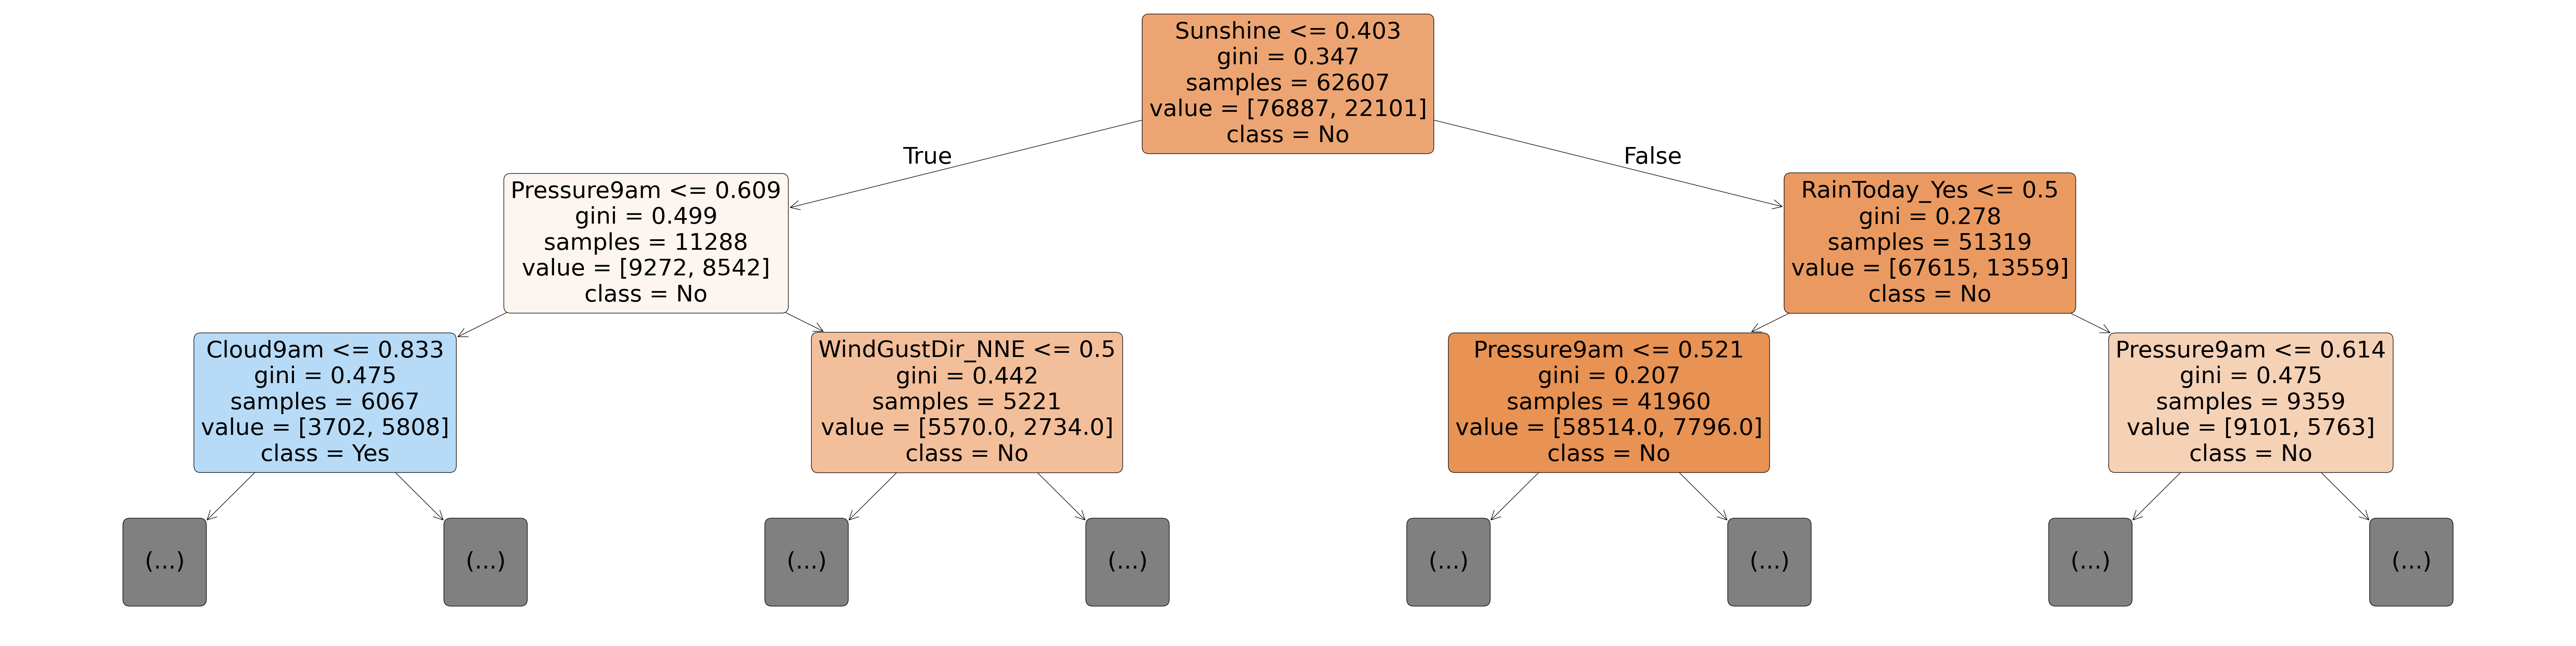

In [62]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

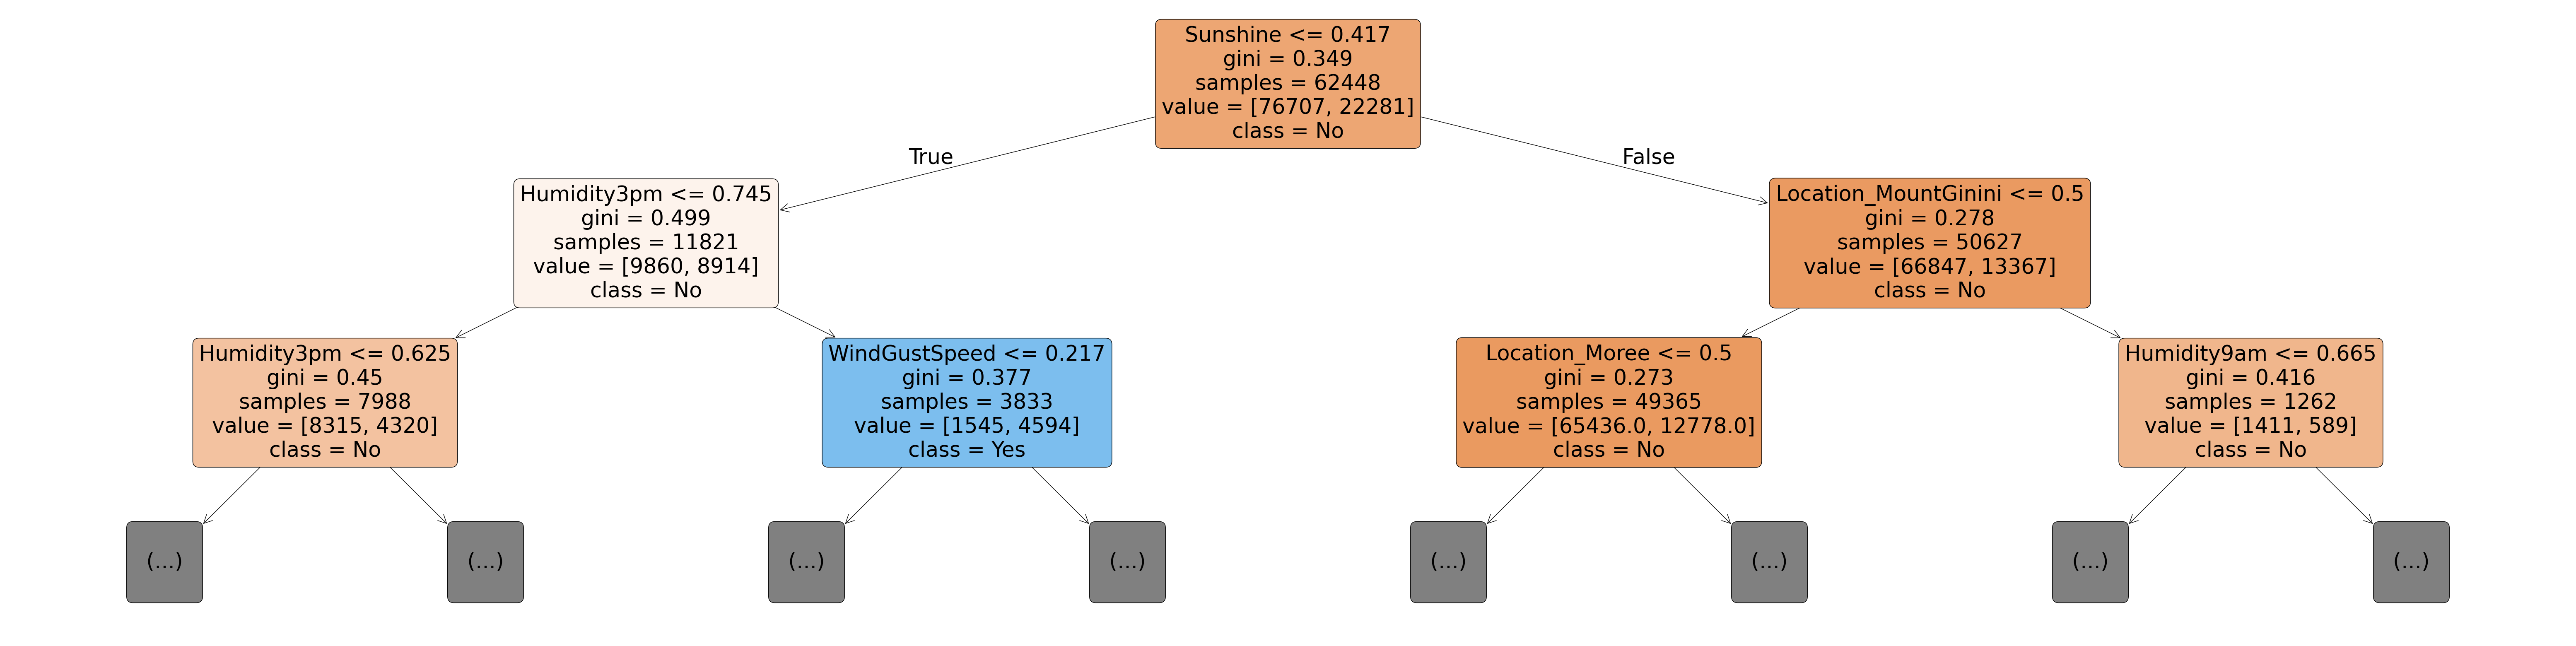

In [63]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[15], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [64]:
len(model.estimators_)

100

In [67]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.139904
4,Sunshine,0.053696
11,Pressure3pm,0.052713
8,Humidity9am,0.050051
2,Rainfall,0.048077
10,Pressure9am,0.047944
5,WindGustSpeed,0.047477
15,Temp3pm,0.044379
1,MaxTemp,0.041865
0,MinTemp,0.041199


## HyperParameter Tuning with Random Forest

In [68]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_targets)
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_vals, val_targets)
base_accs = base_train_acc, base_val_acc
base_accs

(0.9999494888269285, 0.8566537055307295)

## n_estimators - number of Decision trees

In [71]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)

model.fit(X_train, train_targets)
model.score(X_train, train_targets)
model.score(X_vals, val_targets)

0.8485868492832686

In [ ]:
base_accs

(0.9999494888269285, 0.8566537055307295)

## With 500 n_estimators

In [73]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500)
model.fit(X_train, train_targets)

model.score(X_train, train_targets)


0.9999797955307714

In [74]:
model.score(X_vals, val_targets)

0.8577563693343393

In [76]:
def n_estimators_error(ner):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=ner)
    model.fit(X_train, train_targets)
    train_error = 1 - model.score(X_train, train_targets)
    val_error = 1 - model.score(X_vals, val_targets)
    return {"n_estimator": ner, "Train Error": train_error, "Validation Error": val_error}


rf_errors = pd.DataFrame(n_estimators_error(ner) for ner in range(10, 500, 20))

rf_errors

,n_estimator,Train Error,Validation Error
0,10,0.013042,0.151413
1,30,0.001424,0.144449
2,50,0.000354,0.143869
3,70,0.000081,0.141953
4,90,0.000040,0.142882
5,110,0.000040,0.143230
6,130,0.000020,0.142940
7,150,0.000020,0.143230
8,170,0.000020,0.143462
9,190,0.000020,0.143172


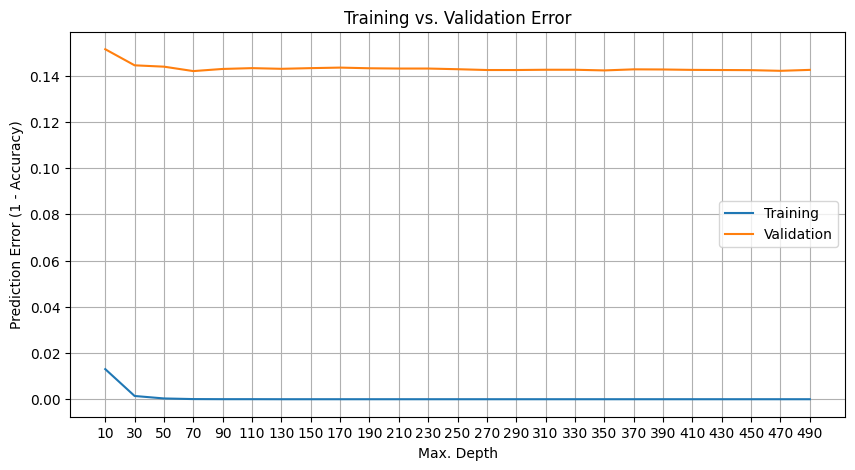

In [86]:
plt.figure(figsize=(10, 5))
plt.plot(rf_errors['n_estimator'], rf_errors['Train Error'])
plt.plot(rf_errors['n_estimator'], rf_errors['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(10, 500, 20))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.grid()
plt.legend(['Training', 'Validation'])